In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
from tqdm.auto import tqdm  # progress bar

In [238]:
df1 = pd.read_csv('./data/origin/understat_2022.csv',  encoding='utf-8')
df2 = pd.read_csv('./data/origin/1xbet_offensive_2022.csv',  encoding='utf-8')

df = pd.merge(df1, df2, left_on = 'Player', right_on = 'Name')
df.columns

Index(['No', 'Player', 'Team_x', 'Apps_x', 'Min', 'G', 'NPG', 'A', 'xG',
       'NPxG', 'xA', 'xGChain', 'xGBuildup', 'xG90', 'NPxG90', 'xA90',
       'xG90+xA90', 'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'Name',
       'Team_y', 'Age', 'Position', 'Apps_y', 'Mins', 'Goals', 'Assists',
       'SpG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating'],
      dtype='object')

In [239]:
df['xG + xA'] = df['xG'] + df['xA']

<Axes: title={'center': 'Player involved in team attack'}, xlabel='expected buildup', ylabel='expected goal + assist'>

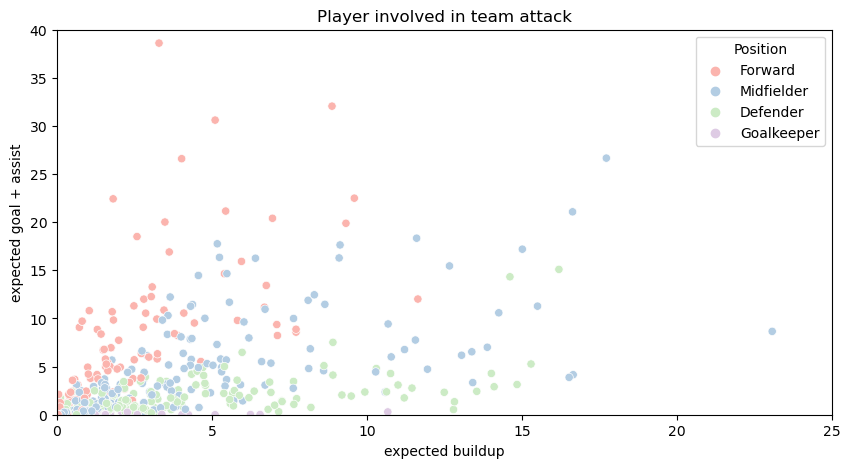

In [241]:
plt.figure(figsize = (10, 5))
plt.xlabel('expected buildup')
plt.ylabel('expected goal + assist')
plt.title('Player involved in team attack')
plt.axis([0, 25, 0, 40])
sns.scatterplot(data = df, x = 'xGBuildup', y = 'xG + xA', hue = 'Position', palette = 'Pastel1')

In [242]:
salary_path = './data/new/salary_all0.csv'
salary = pd.read_csv(salary_path)
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           4803 non-null   float64
 1   Name           4803 non-null   object 
 2   Position       4803 non-null   object 
 3   Team           4803 non-null   object 
 4   Weekly Salary  4803 non-null   int64  
 5   year           4803 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 225.3+ KB


In [243]:
players_path = './data/new/players_all.csv'
players = pd.read_csv(players_path)
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4846 entries, 0 to 4845
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  4846 non-null   int64 
 1   No.         4846 non-null   int64 
 2   Year        4846 non-null   int64 
 3   Name        4846 non-null   object
 4   Age         4846 non-null   int64 
 5   Team        4846 non-null   object
 6   Position    4846 non-null   object
dtypes: int64(4), object(3)
memory usage: 265.1+ KB


In [244]:
# 데이터가 players에 없거나 salary에 없는 경우가 있기에 그런 경우를 제외하기 위해 inner join
player_salary = pd.merge(players, salary, left_on = ['Name', 'Year'], right_on = ['Name', 'year'], how = 'inner')
player_salary.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3319 entries, 0 to 3318
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     3319 non-null   int64  
 1   No.            3319 non-null   int64  
 2   Year           3319 non-null   int64  
 3   Name           3319 non-null   object 
 4   Age            3319 non-null   int64  
 5   Team_x         3319 non-null   object 
 6   Position_x     3319 non-null   object 
 7   Rank           3319 non-null   float64
 8   Position_y     3319 non-null   object 
 9   Team_y         3319 non-null   object 
 10  Weekly Salary  3319 non-null   int64  
 11  year           3319 non-null   int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 337.1+ KB


In [248]:
# 선수 기본 정보와 연봉 데이터만 가지도록 수정
player_salary = player_salary[['Year', 'Name', 'Age', 'Team_x', 'Position_x', 'Weekly Salary']]
player_salary.head()

,Year,Name,Age,Team_x,Position_x,Weekly Salary
0,2014,Eden Hazard,23,Chelsea,Forward,150000
1,2014,Alexis Sanchez,25,Arsenal,Forward,140000
2,2014,Sergio Aguero,26,Man City,Forward,220000
3,2014,Cesc Fabregas,27,Chelsea,Midfielder,156000
4,2014,Santi Cazorla,29,Arsenal,Midfielder,80000


In [249]:
player_salary[player_salary['Name'] == 'Eden Hazard']

,Year,Name,Age,Team_x,Position_x,Weekly Salary
0,2014,Eden Hazard,23,Chelsea,Forward,150000
212,2015,Eden Hazard,24,Chelsea,Forward,225000
414,2016,Eden Hazard,25,Chelsea,Forward,225000
797,2017,Eden Hazard,26,Chelsea,Forward,225000
1217,2018,Eden Hazard,27,Chelsea,Forward,225000


In [250]:
# 1xbet 데이터를 불러와 salary와 rating간의 연관성을 확인
stats = pd.read_csv('./data/new/1xbet_all.csv')
stats.head()

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,...,UnsTch,Rating,Tackles,Inter,Fouls,Offsides,Clear,Drb_y,Blocks,year
0,Eden Hazard,Chelsea,32,Forward,38,3379,14,9,2.052632,2.631579,...,2.105263,7.956842,0.736842,0.578947,0.315789,0.0,0.236842,0.605263,0.026316,2014
1,Alexis Sanchez,Arsenal,34,Forward,35,2953,16,8,3.485714,2.342857,...,2.114286,7.810857,1.971429,1.171429,1.257143,0.0,0.171429,1.542857,0.000000,2014
2,Sergio Aguero,Man City,35,Forward,33,2540,26,8,4.484848,1.000000,...,1.939394,7.671515,0.666667,0.393939,0.545455,0.0,0.060606,0.515152,0.000000,2014
3,Cesc Fabregas,Chelsea,36,Midfielder,34,2890,3,18,1.264706,2.794118,...,1.000000,7.618529,2.588235,0.676471,0.882353,0.0,0.882353,2.117647,0.147059,2014
4,Santi Cazorla,Arsenal,38,Midfielder,37,2992,7,11,2.513514,2.108108,...,1.000000,7.599459,1.594595,1.081081,0.540541,0.0,0.648649,1.459459,0.135135,2014


In [251]:
# merge를 위한 데이터와 Rating 값만 추출
rating = stats[['Name', 'year', 'Rating']]
rating

,Name,year,Rating
0,Eden Hazard,2014,7.956842
1,Alexis Sanchez,2014,7.810857
2,Sergio Aguero,2014,7.671515
3,Cesc Fabregas,2014,7.618529
4,Santi Cazorla,2014,7.599459
...,...,...,...
4751,Chris Wood,2022,6.295200
4752,Danny Ings,2022,6.457429
4753,Daniel James,2022,6.292917
4754,Craig Dawson,2022,6.553600


In [252]:
# player_salary와 rating 데이터 merge
salary_rating = pd.merge(salary_df, rating, left_on = ['Name', 'Year'], right_on = ['Name', 'year'])
salary_rating = salary_rating[['Position_x', 'Weekly Salary', 'Rating']]
salary_rating

,Position_x,Weekly Salary,Rating
0,Forward,150000,7.956842
1,Forward,140000,7.810857
2,Forward,220000,7.671515
3,Midfielder,156000,7.618529
4,Midfielder,80000,7.599459
...,...,...,...
3314,Midfielder,20000,5.996250
3315,Midfielder,5000,5.993333
3316,Defender,38462,5.950000
3317,Midfielder,15000,5.950000


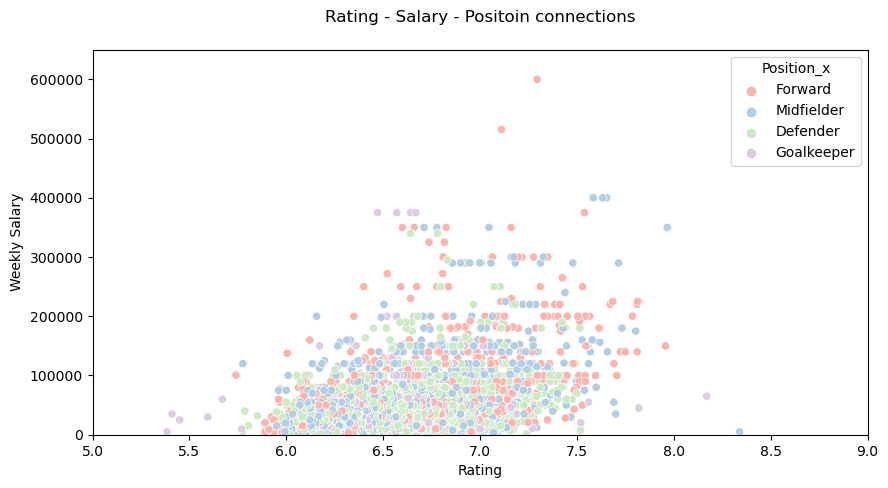

In [257]:
# Rating점수와 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.title('Rating - Salary - Positoin connections', pad = 20)
plt.axis([5, 9, 0, 650000])
sns.scatterplot(data = salary_rating, x = 'Rating', y = 'Weekly Salary', hue = 'Position_x', palette = 'Pastel1')
plt.show()

# understat 데이터의 기대수치들과 연봉의 관계를 확인해보기

In [258]:
# understat 데이터와 연봉과의 관계성
understat = pd.read_csv('./data/new/understat_all.csv')
understat.head()

,No,Player,Team,Apps,Min,G,NPG,A,xG,NPxG,...,xGChain,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90,year
0,619,Sergio Aguero,Manchester City,33,2551,26,21,8,25.27,20.70,...,27.81,6.88,0.89,0.73,0.20,1.09,0.93,0.98,0.24,2014
1,647,Harry Kane,Tottenham,34,2589,21,19,4,17.16,14.87,...,16.49,5.55,0.60,0.52,0.14,0.73,0.65,0.57,0.19,2014
2,802,Diego Costa,Chelsea,26,2111,20,19,3,15.22,14.46,...,21.37,5.28,0.65,0.62,0.19,0.84,0.81,0.91,0.22,2014
3,848,Charlie Austin,Queens Park Rangers,35,3078,18,15,5,17.88,14.08,...,13.72,3.04,0.52,0.41,0.07,0.60,0.49,0.40,0.09,2014
4,498,Alexis Sanchez,Arsenal,35,2967,16,16,8,13.45,12.69,...,27.16,10.74,0.41,0.38,0.26,0.67,0.64,0.82,0.33,2014


In [259]:
salary_df.columns

Index(['Year', 'Name', 'Age', 'Team_x', 'Position_x', 'Weekly Salary'], dtype='object')

In [260]:
salary_understat = pd.merge(salary_df, understat, left_on = ['Name', 'Year'], right_on = ['Player', 'year'], how = 'inner')
salary_understat.columns

Index(['Year', 'Name', 'Age', 'Team_x', 'Position_x', 'Weekly Salary', 'No',
       'Player', 'Team', 'Apps', 'Min', 'G', 'NPG', 'A', 'xG', 'NPxG', 'xA',
       'xGChain', 'xGBuildup', 'xG90', 'NPxG90', 'xA90', 'xG90+xA90',
       'NPxG90+xA90', 'xGChain90', 'xGBuildup90', 'year'],
      dtype='object')

In [262]:
salary_understat['xG + xA'] = salary_understat['xG'] +  salary_understat['xA']
salary_understat.describe()

,Year,Age,Weekly Salary,No,Apps,Min,G,NPG,A,xG,...,xGBuildup,xG90,NPxG90,xA90,xG90+xA90,NPxG90+xA90,xGChain90,xGBuildup90,year,xG + xA
count,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,...,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000,3220.000000
mean,2018.463665,26.088820,63367.019255,2875.101553,22.447205,1618.624224,2.307143,2.116460,1.589130,2.416205,...,3.794134,0.141012,0.133158,0.093876,0.234910,0.227053,0.366537,0.213438,2018.463665,4.079953
std,2.357643,3.993883,55061.438024,2999.418767,10.829556,1002.493116,3.895866,3.504815,2.335978,3.665947,...,3.567601,0.200985,0.192525,0.200478,0.308357,0.301502,0.326587,0.238002,2.357643,5.228359
min,2014.000000,16.000000,100.000000,12.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,0.000000
25%,2017.000000,23.000000,30000.000000,623.500000,14.000000,756.500000,0.000000,0.000000,0.000000,0.200000,...,1.130000,0.020000,0.020000,0.020000,0.060000,0.060000,0.170000,0.100000,2017.000000,0.617500
50%,2019.000000,26.000000,50000.000000,967.000000,24.000000,1600.000000,1.000000,1.000000,1.000000,1.040000,...,2.860000,0.070000,0.060000,0.060000,0.140000,0.140000,0.310000,0.170000,2019.000000,2.170000
75%,2020.000000,29.000000,80000.000000,5736.250000,32.000000,2465.250000,3.000000,3.000000,2.000000,2.910000,...,5.420000,0.190000,0.180000,0.130000,0.350000,0.340000,0.480000,0.280000,2020.000000,5.270000
max,2022.000000,41.000000,600000.000000,11378.000000,38.000000,3420.000000,36.000000,31.000000,20.000000,32.760000,...,23.960000,3.200000,3.200000,8.940000,8.940000,8.940000,8.940000,8.940000,2022.000000,38.610000


In [268]:
salary_understat[salary_understat['Name'] == 'Son Heung-Min'][['Year', 'Name', 'Age', 'Team_x', 'Position_x', 
                                                           'Weekly Salary', 'G', 'xG', 'A', 'xA', 'xG + xA',
                                                           'xGBuildup']]

,Year,Name,Age,Team_x,Position_x,Weekly Salary,G,xG,A,xA,xG + xA,xGBuildup
344,2015,Son Heung-Min,23,Tottenham,Forward,85000,4,4.18,1,0.77,4.95,4.45
458,2016,Son Heung-Min,24,Tottenham,Forward,85000,14,7.77,6,4.70,12.47,4.28
853,2017,Son Heung-Min,25,Tottenham,Forward,85000,12,11.02,6,6.59,17.61,6.26
1230,2018,Son Heung-Min,26,Tottenham,Forward,140000,12,8.36,6,3.97,12.33,6.03
1628,2019,Son Heung-Min,27,Tottenham,Forward,140000,11,9.70,10,6.72,16.42,6.51
2028,2020,Son Heung-Min,28,Tottenham,Forward,140000,17,11.02,10,9.51,20.53,6.61
2422,2021,Son Heung-Min,29,Tottenham,Forward,192000,23,16.99,7,7.85,24.84,10.34
2885,2022,Son Heung-Min,30,Tottenham,Forward,192000,10,9.60,6,6.33,15.93,5.95


In [269]:
players[players['Name'] == 'Son Heung-Min']

,Unnamed: 0,No.,Year,Name,Age,Team,Position
919,919,1540,2015,Son Heung-Min,23,Tottenham,Forward
1170,1170,1540,2016,Son Heung-Min,24,Tottenham,Forward
1740,1740,1540,2017,Son Heung-Min,25,Tottenham,Forward
2219,2219,1540,2018,Son Heung-Min,26,Tottenham,Forward
2704,2704,1540,2019,Son Heung-Min,27,Tottenham,Forward
3216,3216,1540,2020,Son Heung-Min,28,Tottenham,Forward
3737,3737,1540,2021,Son Heung-Min,29,Tottenham,Forward
4343,4343,1540,2022,Son Heung-Min,30,Tottenham,Forward


/var/folders/5r/gwhqhzlx7g5_xdjhhpzr42_h0000gn/T/ipykernel_38272/4283905813.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


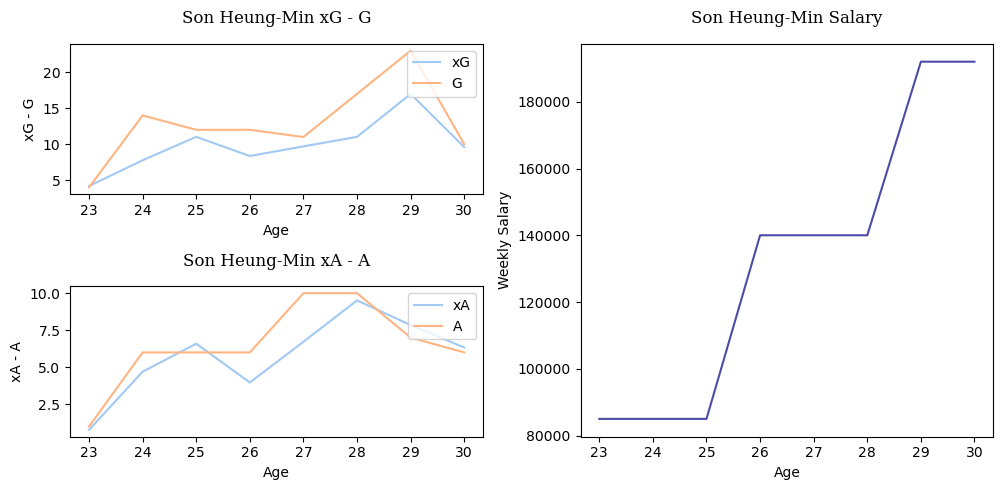

In [270]:
# 특정 선수의 스탯과 연봉 데이터
player_name = 'Son Heung-Min'
one_player = salary_understat[salary_understat['Name'] == player_name]

plt.figure(figsize = (10, 5))
plt.xticks(one_player['Age'].unique())

# xG - G
sns.set_palette('pastel')
plt.subplot(2, 2, 1)
plt.title(f'{player_name} xG - G', pad = 15, fontfamily = 'serif')
plt.ylabel('xG - G')

sns.lineplot(data = one_player, x = 'Age', y = 'xG', label = 'xG')
sns.lineplot(data = one_player, x = 'Age', y = 'G', label = 'G')
plt.legend(loc = 'upper right')

# xA - A
sns.set_palette('pastel')
plt.subplot(2, 2, 3)
plt.title(f'{player_name} xA - A', pad = 15, fontfamily = 'serif')
plt.ylabel('xA - A')

sns.lineplot(data = one_player, x = 'Age', y = 'xA', label = 'xA')
sns.lineplot(data = one_player, x = 'Age', y = 'A', label = 'A')
plt.legend(loc = 'upper right')

# Salary
plt.subplot(1, 2, 2)
plt.title(f'{player_name} Salary', pad = 15, fontfamily = 'serif')

sns.lineplot(data = one_player, x = 'Age', y = 'Weekly Salary', color = 'navy', alpha = 0.7)

plt.tight_layout()
plt.show()

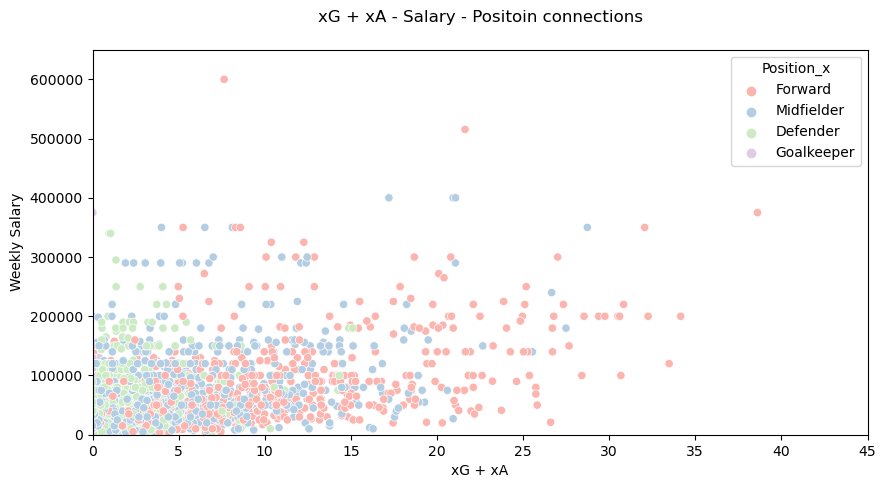

In [271]:
# x값들과 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 45, 0, 650000])
plt.title('xG + xA - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_understat, x = 'xG + xA', y = 'Weekly Salary', hue = 'Position_x', palette = 'Pastel1')
plt.show()

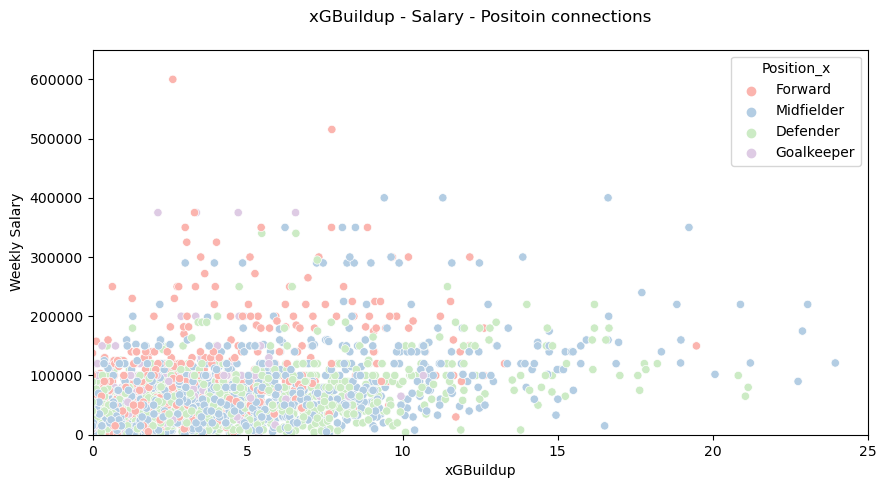

In [272]:
# xGBuildup와 Salary의 관계성
plt.figure(figsize = (10, 5))
plt.axis([0, 25, 0, 650000])
plt.title('xGBuildup - Salary - Positoin connections', pad = 20)
sns.scatterplot(data = salary_xstats, x = 'xGBuildup', y = 'Weekly Salary', hue = 'Position_x', palette = 'Pastel1')
plt.show()